In [1]:
import pandas as pd
import preprocessing as pp
import utils as utils
import numpy as np
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron

In [2]:
import random
seed = 100
np.random.seed(seed)
random.seed(seed)

In [3]:
X, y = utils.importar_datos()

### Modelo 1

- Preprocesamiento con StandardScaler
- Preprocesamiento de variables categoricas con OneHotEncoding
- Perceptron lineal de sklearn

In [4]:
pipeline = Pipeline([
    ("preprocessor", pp.PreprocessingSE()),
    ("model", Perceptron(random_state=pp.RANDOM_STATE))
])

#### Metricas

In [5]:
utils.metricas_cross_validation(X, y, pipeline, True)

,Mean,Std,Oof,Max,Min
roc auc,0.790483,0.056410,0.767216,0.871180,0.699915
accuracy,0.746572,0.044386,0.746567,0.830000,0.660000
precision,0.740461,0.106894,0.720339,0.937500,0.625000
recall,0.553559,0.168589,0.553746,0.789474,0.263158
f1 score,0.612563,0.111082,0.626151,0.767123,0.370370


El mal resultado se puede deber a que los datos no son linealmente separables.

### Modelo 2

- Se utiliza el mismo preprocesamiento que en el modelo anterior
- Se buscan hiperparámetros para ver si mejora el score, de lo contrario se descarta el modelo.

In [6]:
pipeline = Pipeline([
    ("preprocessor", pp.PreprocessingSE()),
    ("model", Perceptron(random_state=pp.RANDOM_STATE, n_jobs=-1))
])

In [7]:
#from sklearn.model_selection import GridSearchCV
#params = {
#    'model__penalty': ["elasticnet"],
#    'model__alpha': [0.0001, 0.001, 0.00001],
#    'model__l1_ratio': [0, 0.15, 0.4, 0.5, 0.3, 1],
#    'model__max_iter': [1000, 2000],
#    'model__early_stopping': [True, False],
#    'model__n_iter_no_change': [5, 30, 60],
#    'model__eta0': [1, 0.9, 0.5, 1.2]
#}

#cv = utils.kfold_for_cross_validation()
#gscv = GridSearchCV(
#    pipeline, params, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True, refit=True
#).fit(X, y)
#print(gscv.best_score_)
#print(gscv.best_params_)

In [8]:
#gscv.best_estimator_

In [9]:
pipeline = Pipeline([
    ("preprocessor", pp.PreprocessingSE()),
    ("model", Perceptron(random_state=pp.RANDOM_STATE, 
                         n_jobs=-1,
                         alpha=0.0001,
                         early_stopping=True,
                         n_iter_no_change=30,
                         l1_ratio=0.3,
                         max_iter=1000,
                         penalty='elasticnet',
                         eta0=0.9
                        ))
])

#### Metricas

In [10]:
utils.metricas_cross_validation(X, y, pipeline, True)

,Mean,Std,Oof,Max,Min
roc auc,0.785234,0.095997,0.776804,0.865238,0.545840
accuracy,0.706535,0.112740,0.706617,0.800000,0.470000
precision,0.643226,0.148297,0.600000,0.814815,0.372881
recall,0.702513,0.101947,0.703583,0.871795,0.578947
f1 score,0.655913,0.084128,0.647676,0.736842,0.453608


### Metricas finales

In [11]:
pipeline = Pipeline([
    ("preprocessor", pp.PreprocessingSE()),
    ("model", Perceptron(random_state=pp.RANDOM_STATE, 
                         n_jobs=-1,
                         alpha=0.0001,
                         early_stopping=True,
                         n_iter_no_change=30,
                         l1_ratio=0.3,
                         max_iter=1000,
                         penalty='elasticnet',
                         eta0=0.9
                        ))
])

AUC_ROC,Accuracy,Precision,Recall,F1 Score
0.607101,0.479339,0.397590,0.717391,0.511628


Matriz de confusión:


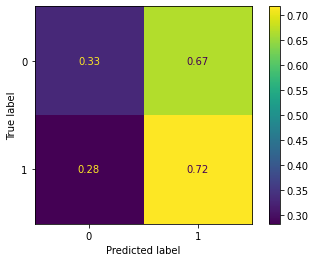

In [12]:
pipeline = utils.entrenar_y_realizar_prediccion_final_con_metricas(X, y, pipeline, True)

Los resultados obtenidos fueron muy malos por lo que se abandonó el modelo. Como puede verse, el modelo tiene una muy alta tasa de Falsos Positivos, afectando negativamente a todas las métricas. Esto puede deberse a que los datos no sean lineamente separables.